In [242]:
# import packages 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


# load train and test data sets
path_to_file = "../../data/train.csv"
train = pd.read_csv(path_to_file)

path_to_file = "../../data/test.csv"
test = pd.read_csv(path_to_file)

In [243]:
# merge train and test for cleaning
test['SalePrice'] = None
master = train.append(pd.DataFrame(test), ignore_index=True)

# Data Cleaning 

In [244]:
# drop Id column
Ids = master.Id
master.drop(['Id'], axis = 1, inplace = True)

In [245]:
# feature notes:
# Id - don't use for analysis, need to add back at end to submit for test

### convert to /dummy, can I collapse?
# MSSubClass (type of dwelling)
# MSZoning (zoning classification)
# MoSold (month sold in)
# LotConfig - collapse FR3 and FR2
# PoolArea - yes or no pool
# street - gravel or pave
# LotShape - collapse to irregular or not 
# LandContour - Lvl or not
# LandSlope - collapse to Gtl or Slope
# Neighborhood
# Condition1 - collapse near railroad, near street, near positive feature
# BldgType - collapse Townhouse, TwoFamCond/Duplex
# HouseStyle - collapse 1, 1.5, 2&2.5, Sfoyer, Slevel
# RoofStyle
# Exterior1st
# Exterior2nd
# MasVnrArea - yes or no
# Foundation
# CentralAir
# Electrical - collapse to SBKR or no
# Fence
# MiscFeature - shed or no shed
# SaleType - collapse
# SaleCondition
# Functional - y/n
# GarageType
# PavedDrive - y/n & partial

### cont./discrete - adjust for skew
# LotFrontage - linear feet of street connected to property
# LotArea
# total Sq ft - this is sum of 'TotalBsmtSF'  + 'GrLivArea'
# YearBuilt
# LowQualFinSF
# full baths - 'BsmtFullBath','FullBath',
# half baths - 'BsmtHalfBath','HalfBath',
# YrSold
# Fireplaces
# BedroomAbvGr
# KitchenAbvGr
# TotRmsAbvGrd
# GarageCars
# GarageArea - has some skew
# create porch sqft - 'EnclosedPorch', '3SsnPorch','ScreenPorch',
# WoodDeckSF
# OpenPorchSF

### ord. - transformations when plotted vs. y? can I collapse?
# OverlQual - materials and finish
# OveralCond - condition
# ExterQual
# ExterCond
# BsmtExposure - CHECK graph, this includes no basement. Maybe Dummy
# BsmtFinType1 - CHECK graph, this includes no basement. Maybe Dummy
# Buckets of when it was remodeled by years ago - ADD from YearRemodAdd
# HeatingQC - collapse
# KitchenQual - collapse
# GarageFinish
# GarageQual - collapse
# GarageCond - collapse 

### drop
# PoolQC - not many observations, small range with in the observations
# Alley - only ~6% have an alley at all, probably won't have much effect on price
# Utilities - all pub except one or two
# Condition2 - not many have this 
# RoofMatl - mostly all the same, probably accounted for in RoofStyle
# BsmtCond
# BsmtQual
# BsmtFinType2
# BsmtFinSF1
# BsmtFinSF2
# Heating
# FireplaceQu
# MiscVal
# GarageYrBlt
# ---
# YearRemodAdd - make into ord.
# 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', - to half and full baths
# 'TotalBsmtSF'  'GrLivArea' to total sq
# 'EnclosedPorch', '3SsnPorch','ScreenPorch', to porch sqft
######### Feat engineering
# first floor sf and second floor sf - sum these and eliminate other 
# total sq foot of house
#########

In [246]:
# drop vars to drop
master.drop(['PoolQC', 'Alley', 'Utilities', 'Condition2', 'RoofMatl', 'BsmtCond', 'BsmtQual', 'BsmtFinType2',
            'BsmtFinSF1', 'BsmtFinSF2', 'Heating', 'FireplaceQu', 'MiscVal', 'GarageYrBlt'], axis = 1, inplace = True)

In [247]:
# create df with continuous and discrete variables 
contDiscVars = master[['LotFrontage', 'LotArea', 'YearBuilt', 'LowQualFinSF',
                     'YrSold', 'Fireplaces', 'BedroomAbvGr', 'KitchenAbvGr',
                     'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 
                     'WoodDeckSF', 'OpenPorchSF']]

contDiscVars['totSF'] = master['TotalBsmtSF'] + master['GrLivArea']
contDiscVars['bathsF'] = master['BsmtFullBath'] + master['FullBath']
contDiscVars['bathsH'] = master['BsmtHalfBath'] + master['HalfBath']
contDiscVars['porchSF'] = master['EnclosedPorch'] + master['3SsnPorch'] + master['ScreenPorch']

# add years since remodeling variable
yearB = pd.DataFrame([i for i in master.YearBuilt])
remo = pd.DataFrame([i for i in master.YearRemodAdd])
BxRemo = pd.concat([yearB.reset_index(drop=True), remo], axis=1)
BxRemo.columns = ['B', 'R']
#BxRemo["F"] = BxRemo['B']/BxRemo['R']
#Remos = BxRemo[BxRemo['F']<1]
BxRemo['Y'] = BxRemo['R'] - BxRemo['B']
#BxRemo[BxRemo['Y']>0]
contDiscVars['YrSinceRemo'] = BxRemo['Y']

/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [248]:
# collapse ordinal values

# collapse ordinal variables 
master.replace({'ExterQual': 'Fa'}, {'ExterQual': 'TA'}, regex=True, inplace = True)
master.replace({'ExterCond': 'Ex'}, {'ExterCond': 'Gd'}, regex=True, inplace = True)
master.replace({'ExterCond': 'Fa'}, {'ExterCond': 'TA'}, regex=True, inplace = True)
master.replace({'BsmtExposure': 'No'}, {'BsmtExposure': 'Mn'}, regex=True, inplace = True)
master.replace({'BsmtExposure': 'Av'}, {'BsmtExposure': 'Gd'}, regex=True, inplace = True)
master.replace({'HeatingQC': 'Fa'}, {'HeatingQC': 'Gd'}, regex=True, inplace = True)
master.replace({'HeatingQC': 'Gd'}, {'HeatingQC': 'TA'}, regex=True, inplace = True)
master.replace({'KitchenQual': 'Fa'}, {'KitchenQual': 'TA'}, regex=True, inplace = True)
master.replace({'KitchenQual': 'Fa'}, {'KitchenQual': 'TA'}, regex=True, inplace = True)
master.replace({'GarageQual': 'Ex'}, {'GarageQual': 'Gd'}, regex=True, inplace = True)
master.replace({'GarageQual': 'Fa'}, {'GarageQual': 'TA'}, regex=True, inplace = True)
master.replace({'GarageCond': 'Ex'}, {'GarageCond': 'Gd'}, regex=True, inplace = True)
master.replace({'GarageCond': 'Fa'}, {'GarageCond': 'TA'}, regex=True, inplace = True)


In [249]:
# ordinal variables to ordinal
var_to_ord ={"ExterQual": {"Ex": 3, "Gd": 2, "TA": 1},
                "ExterCond": {"Gd": 3, "TA": 2, "Po": 1},
                "BsmtExposure": {"Gd": 3, "Mn": 2, np.nan: 1}, # missing means no basement
                "BsmtFinType1": {'GLQ':7, 'ALQ':6, 'Unf':2, 'Rec':4, 'BLQ':5, np.nan:1, 'LwQ':3},
                "HeatingQC": {"Ex": 3, "TA": 2, "Po": 1},
                "KitchenQual": {"Ex": 3, "Gd": 2, "TA": 1},
                "GarageFinish": {'RFn': 3, 'Unf': 2, 'Fin': 4, np.nan: 1},
                    
                "GarageQual": {"Gd": 4, "TA": 3, "Po": 2, np.nan: 1},
                "GarageCond": {"Gd": 4, "TA": 3, "Po": 2, np.nan: 1}
            }

master.replace(var_to_ord, inplace=True)

In [250]:
# create df of ordinal values
ordVars = master[["OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtExposure", "BsmtFinType1", "HeatingQC", "KitchenQual", "GarageFinish", "GarageQual", "GarageCond"]]

In [251]:
# collapse dummy variables

master.replace({'LogConfig': 'FR3'}, {'LogConfig': 'FR2'}, regex=True, inplace = True)
master.replace({'LogConfig': 'FR2'}, {'LogConfig': 'FR'}, regex=True, inplace = True)
master['MiscFeature'] = [1 if i == 'Shed' else 0 for i in master['MiscFeature']]
master['PoolArea'] = [0 if i == 0  else 1 for i in master['PoolArea']]
master['CentralAir'] = [0 if i =='N'  else 1 for i in master['CentralAir']]
master['Street'] = [0 if i == "Grvl"  else 1 for i in master['Street']]
master['MasVnrArea'] = [0 if i == "No"  else 1 for i in master['MasVnrArea']]

master.replace({'LotShape': 'IR3'}, {'LotShape': 'IR1'}, regex=True, inplace = True)
master.replace({'LotShape': 'IR2'}, {'LotShape': 'IR1'}, regex=True, inplace = True)
master.replace({'LotShape': 'IR1'}, {'LotShape': 'IR'}, regex=True, inplace = True)

master.replace({'LandContour': 'Bnk'}, {'LandContour': 'NoLvl'}, regex=True, inplace = True)
master.replace({'LandContour': 'HLS'}, {'LandContour': 'NoLvl'}, regex=True, inplace = True)
master.replace({'LandContour': 'Low'}, {'LandContour': 'NoLvl'}, regex=True, inplace = True)

master.replace({'LandSlope': 'Mod'}, {'LandSlope': 'Slp'}, regex=True, inplace = True)
master.replace({'LandSlope': 'Sev'}, {'LandSlope': 'Slp'}, regex=True, inplace = True)

master.replace({'Condition1': 'Feedr'}, {'Condition1': 'St'}, regex=True, inplace = True)
master.replace({'Condition1': 'Artery'}, {'Condition1': 'St'}, regex=True, inplace = True)
master.replace({'Condition1': 'PosN'}, {'Condition1': 'Pos'}, regex=True, inplace = True)
master.replace({'Condition1': 'PosA'}, {'Condition1': 'Pos'}, regex=True, inplace = True)
master.replace({'Condition1': 'RRNn'}, {'Condition1': 'RR'}, regex=True, inplace = True)
master.replace({'Condition1': 'RRAn'}, {'Condition1': 'RR'}, regex=True, inplace = True)
master.replace({'Condition1': 'RRNe'}, {'Condition1': 'RR'}, regex=True, inplace = True)
master.replace({'Condition1': 'RRAe'}, {'Condition1': 'RR'}, regex=True, inplace = True)

master.replace({'BldgType': 'TwnhsE'}, {'BldgType': 'Twnhs'}, regex=True, inplace = True)
master.replace({'BldgType': '2fmCon'}, {'BldgType': '2fam'}, regex=True, inplace = True)
master.replace({'BldgType': 'Duplex'}, {'BldgType': '2fam'}, regex=True, inplace = True)

master.replace({'HouseStyle': '1.5Fin'}, {'HouseStyle': '1.5'}, regex=True, inplace = True)
master.replace({'HouseStyle': '1.5Unf'}, {'HouseStyle': '1.5'}, regex=True, inplace = True)
master.replace({'HouseStyle': '2.5Unf'}, {'HouseStyle': '2/2.5'}, regex=True, inplace = True)
master.replace({'HouseStyle': '2.5Unf'}, {'HouseStyle': '2/2.5'}, regex=True, inplace = True)
master.replace({'HouseStyle': '2Story'}, {'HouseStyle': '2/2.5'}, regex=True, inplace = True)

master['Electrical'] = [1 if i == "SBrkr"  else 0 for i in master['Electrical']]

master.replace({'SaleType': 'CWD'}, {'SaleType': 'WD'}, regex=True, inplace = True)
master.replace({'SaleType': 'VWD'}, {'SaleType': 'WD'}, regex=True, inplace = True)
master.replace({'SaleType': 'ConLI'}, {'SaleType': 'ConLw'}, regex=True, inplace = True)
master.replace({'SaleType': 'ConLD'}, {'SaleType': 'ConLw'}, regex=True, inplace = True)     
       
master['Function'] = [1 if i == "Typ"  else 0 for i in master['Functional']]

master['PavedDrive'] = [1 if i == "Y"  else 0 for i in master['PavedDrive']]


In [252]:
# create dummy list
dummyList = ['MSSubClass', 'MSZoning', 'MoSold', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 'Fence', 'SaleCondition', 'GarageType', 'LotConfig', 'MiscFeature', 'PoolArea', 'Street', 'CentralAir', 'MasVnrArea', 'LotShape', 'LandContour','LandSlope', 'Condition1', 'BldgType','HouseStyle','SaleType','Functional','PavedDrive']


In [253]:
# get rid of dummy missing values
dummies = master[dummyList]


dummy_na_list = ['Fence', 'GarageType']

def zeroNAs(x):
    for i in x:
        master[i].fillna("No",inplace=True)


zeroNAs(dummy_na_list)
dummies.isnull().sum().sort_values(ascending = False)

Fence            2348
GarageType        157
MSZoning            4
Functional          2
SaleType            1
Exterior1st         1
Exterior2nd         1
PavedDrive          0
LotConfig           0
MoSold              0
Neighborhood        0
RoofStyle           0
Foundation          0
SaleCondition       0
MiscFeature         0
PoolArea            0
Street              0
CentralAir          0
MasVnrArea          0
LotShape            0
LandContour         0
LandSlope           0
Condition1          0
BldgType            0
HouseStyle          0
MSSubClass          0
dtype: int64

# Imputing Missing Data

In [254]:
# class to impute missing data for dummy variables based on most frequent value 
# DO WE WANT TO DO KNN FOR THIS?

from sklearn.base import TransformerMixin
from sklearn.base import BaseEstimator

class CustomImputer(BaseEstimator, TransformerMixin):
    def __init__(self, strategy='mean',filler='NA'):
        self.strategy = strategy
        self.fill = filler

    def fit(self, X, y=None):
        if self.strategy in ['mean','median']:
            if not all(X.dtypes == np.number):
                raise ValueError('dtypes mismatch np.number dtype is \
                                 required for '+ self.strategy)
        if self.strategy == 'mean':
            self.fill = X.mean()
        elif self.strategy == 'median':
            self.fill = X.median()
        elif self.strategy == 'mode':
            self.fill = X.mode().iloc[0]
        elif self.strategy == 'fill':
            if type(self.fill) is list and type(X) is pd.DataFrame:
                self.fill = dict([(cname, v) for cname,v in zip(X.columns, self.fill)])
        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [255]:
imputedDummies = CustomImputer(strategy='mode').fit_transform(dummies)

In [256]:
imputedDummies.isnull().sum().sort_values(ascending = False)

PavedDrive       0
Functional       0
MSZoning         0
MoSold           0
Neighborhood     0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
Foundation       0
Fence            0
SaleCondition    0
GarageType       0
LotConfig        0
MiscFeature      0
PoolArea         0
Street           0
CentralAir       0
MasVnrArea       0
LotShape         0
LandContour      0
LandSlope        0
Condition1       0
BldgType         0
HouseStyle       0
SaleType         0
MSSubClass       0
dtype: int64

In [257]:
# function to dummify variables
def dummify(x):
    dummy = pd.DataFrame([])
    for i in x:
        dummylist = pd.get_dummies(i, prefix = str(i.name), prefix_sep= '_')
        dummylist = dummylist.drop(str(i.name) + '_' + str(i[0]), axis = 1)   
        dummy = pd.concat([dummy, dummylist], axis =1)
    return dummy

In [258]:
# dummify dummyList

dummyList = [imputedDummies['MSSubClass'], imputedDummies['MSZoning'], imputedDummies['MoSold'], imputedDummies['Neighborhood'], imputedDummies['RoofStyle'], imputedDummies['Exterior1st'], imputedDummies['Exterior2nd'], imputedDummies['Foundation'], imputedDummies['Fence'], imputedDummies['SaleCondition'], imputedDummies['GarageType'], imputedDummies['LotConfig'], imputedDummies['MiscFeature'], imputedDummies['PoolArea'], imputedDummies['Street'], imputedDummies['CentralAir'], imputedDummies['MasVnrArea'], imputedDummies['LotShape'], imputedDummies['LandContour'],imputedDummies['LandSlope'], imputedDummies['Condition1'], imputedDummies['BldgType'],imputedDummies['HouseStyle'],imputedDummies['SaleType'],imputedDummies['Functional'],imputedDummies['PavedDrive']]
dummyFrame = dummify(dummyList)

In [259]:
# ordinal missing data
ordVars.isnull().sum().sort_values(ascending = False)

KitchenQual     1
GarageCond      0
GarageQual      0
GarageFinish    0
HeatingQC       0
BsmtFinType1    0
BsmtExposure    0
ExterCond       0
ExterQual       0
OverallCond     0
OverallQual     0
dtype: int64

In [260]:
imputedOrdVars = CustomImputer(strategy='mode').fit_transform(ordVars)

In [261]:
# continuous missing data
contDiscVars.isnull().sum().sort_values(ascending = False)

LotFrontage     486
bathsH            2
bathsF            2
totSF             1
GarageArea        1
GarageCars        1
Fireplaces        0
LotArea           0
YearBuilt         0
LowQualFinSF      0
YrSold            0
YrSinceRemo       0
BedroomAbvGr      0
KitchenAbvGr      0
porchSF           0
WoodDeckSF        0
OpenPorchSF       0
TotRmsAbvGrd      0
dtype: int64

In [262]:
cont_na_list = ['LotFrontage']

def zeroNAs2(x):
    for i in x:
        contDiscVars[i].fillna(0,inplace=True)


zeroNAs2(cont_na_list)

/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [263]:
contDiscVars.isnull().sum().sort_values(ascending = False)

bathsH          2
bathsF          2
totSF           1
GarageArea      1
GarageCars      1
YrSinceRemo     0
Fireplaces      0
LotArea         0
YearBuilt       0
LowQualFinSF    0
YrSold          0
TotRmsAbvGrd    0
BedroomAbvGr    0
KitchenAbvGr    0
porchSF         0
WoodDeckSF      0
OpenPorchSF     0
LotFrontage     0
dtype: int64

In [264]:
imputedContDiscVars = CustomImputer(strategy='mode').fit_transform(contDiscVars)
imputedContDiscVars.isnull().sum().sort_values(ascending = False)

YrSinceRemo     0
porchSF         0
LotArea         0
YearBuilt       0
LowQualFinSF    0
YrSold          0
Fireplaces      0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
GarageCars      0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
totSF           0
bathsF          0
bathsH          0
LotFrontage     0
dtype: int64

# Outliers

In [265]:
# see outliers in training set of continuous variables
Cont = pd.concat([imputedContDiscVars, master.SalePrice], axis = 1)
trainCont = Cont[Cont.SalePrice.notnull()]
testCont = Cont[Cont.SalePrice.isnull()]

# training set for ordinals and dummys
Ord = pd.concat([imputedOrdVars, master.SalePrice], axis = 1)
trainOrd = Ord[Ord.SalePrice.notnull()]
testOrd = Ord[Ord.SalePrice.isnull()]
trainOrd.drop(['SalePrice'], axis =1, inplace = True)
testOrd.drop(['SalePrice'], axis =1, inplace = True)

Dum = pd.concat([dummyFrame, master.SalePrice], axis = 1)
trainDum = Dum[Dum.SalePrice.notnull()]
testDum = Dum[Dum.SalePrice.isnull()]
trainDum.drop(['SalePrice'], axis =1, inplace = True)
testDum.drop(['SalePrice'], axis =1, inplace = True)


/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ver

In [266]:
# function to find outliers > 4x SD
def cutOutlier(x):
    cutOutliers = pd.DataFrame([])
    for i in x:
        emptyList = []
        m = np.mean(x[i])
        sd = np.std(x[i])
        for j in x[i]:
            if np.abs(j)< 6*np.abs(sd):
                emptyList.append(j)
            else:
                emptyList.append("Dropped")
        cutOutliers[i] = pd.Series(emptyList)
    
    return cutOutliers
    

In [267]:
noOutliersCont = cutOutlier(trainCont)

In [268]:
# take LotArea, totSF, bathsF, SalePrice
noOutliers = noOutliersCont[['SalePrice', 'LotArea', 'totSF', 'bathsF']]

In [269]:
# drop cols from original trainCont df
trainCont = trainCont.drop(['SalePrice', 'LotArea', 'totSF', 'bathsF'], axis =1)

In [270]:
# join cont cols with dropped NAs to other train columns
merge = pd.concat([trainCont, noOutliers, trainDum, trainOrd], axis =1)

In [271]:
# list of rows to drop
drop = list(merge[merge.SalePrice == "Dropped"].index) + list(merge[merge.LotArea == "Dropped"].index) + list(merge[merge.totSF == "Dropped"].index) + list(merge[merge.bathsF == "Dropped"].index)

In [272]:
# drop index with NAs
merge.drop(drop, inplace = True)

# Transformations

In [398]:
# test data
mergeTest = pd.concat([testCont, testDum, testOrd], axis =1)

In [399]:
# recombine test and train as merged
merged = merge.append(mergeTest)

#Renaming MiscFeatures as "Shed"
merged.rename(columns={'MiscFeature':'Shed'}, inplace=True)

#Renaming PoolArea as "Pool" 
merged.rename(columns={"PoolArea":"Pool"}, inplace=True)

In [400]:
# apply transformations
merged.LotArea = [i**(1/2) for i in merged.LotArea]
merged.OpenPorchSF = [i**(1/2) for i in merged.OpenPorchSF]
merged.totSF = [i**(2) for i in merged.totSF]
merged.OverallQual = [i**(2) for i in merged.OverallQual]

In [384]:
# separate train and test

In [385]:
train = merged[merged.SalePrice.notnull()]
test = merged[merged.SalePrice.isnull()]
test.drop(['SalePrice'], axis =1, inplace = True)

/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(array([2.327e+03, 3.690e+02, 1.610e+02, 2.500e+01, 9.000e+00, 4.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([   0. ,  101.2,  202.4,  303.6,  404.8,  506. ,  607.2,  708.4,
         809.6,  910.8, 1012. ]),
 <a list of 10 Patch objects>)

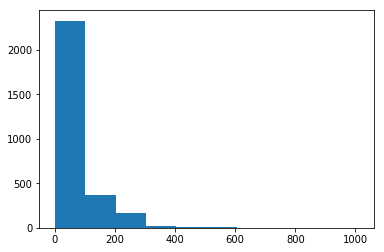

In [395]:
plt.hist(merged.porchSF)

In [300]:
import math

In [396]:
merged.porchSF = [np.log(i+1)for i in merged.porchSF]

In [397]:
pd.DataFrame.skew(merged.porchSF)

1.219213356723015

In [230]:

merged.OpenPorchSF = [np.log(i) for i in merged.OpenPorchSF]

/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


0        7.810250
1        0.000000
2        6.480741
3        5.916080
4        9.165151
5        5.477226
6        7.549834
7       14.282857
8        0.000000
9        2.000000
10       0.000000
11       4.582576
12       0.000000
13       5.744563
14      14.594520
15      10.583005
16       0.000000
17       0.000000
18      10.099505
19       0.000000
20      12.409674
21       0.000000
22      12.609520
23      10.488088
24       9.486833
25       7.483315
26       5.656854
27       7.071068
28      16.062378
29       0.000000
          ...    
2889     0.000000
2890     4.582576
2891     0.000000
2892     0.000000
2893     0.000000
2894     7.280110
2895     7.280110
2896     5.291503
2897     0.000000
2898    10.000000
2899     0.000000
2900     0.000000
2901    13.152946
2902     6.164414
2903    15.000000
2904     0.000000
2905     6.928203
2906     0.000000
2907    10.954451
2908     0.000000
2909     0.000000
2910     0.000000
2911     0.000000
2912     0.000000
2913     5

In [401]:
merged.porchSF = [np.log(i+1)for i in merged.porchSF]
merged.WoodDeckSF = [np.log(i+1)for i in merged.WoodDeckSF]
merged.LotArea = [math.sqrt(i)for i in merged.LotArea]
merged.OverallQual = [math.sqrt(i) for i in merged.OverallQual]
merged.TotRmsAbvGrd = [np.log(i) for i in merged.TotRmsAbvGrd]
merged.totSF = [np.log(i) for i in merged.totSF]

# Ridge

In [402]:
train = train.set_index('SalePrice').reset_index()

In [403]:
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression

X = train.iloc[:, 1:].values
y = train.iloc[:, 0]

import random
from sklearn.cross_validation import train_test_split
random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [404]:
X1_train = pd.DataFrame(X_train)
X1_train.columns = [list(train.columns)[:-1]]

y1_train = pd.Series(y_train)

X1_test = pd.DataFrame(X_test)
X1_test.columns = [list(train.columns)[:-1]]

In [405]:
predictors=[i for [i] in list(X1_train.columns)]

In [406]:
from sklearn import linear_model
alpha_ridge1 = 10**np.linspace(5, -2, 100)
ridge1= linear_model.RidgeCV(alphas=alpha_ridge1, cv=20).fit(X_train,np.ravel(y_train))

ridgeCoef1 = pd.DataFrame(data=ridge1.coef_, index = predictors).reset_index()

/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0470764549773073e-16 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0412124185890347e-16 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.047981644321597e-16 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: sci

/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 9.358391761460431e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 9.173844323194836e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 9.042155194992194e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy

/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.21721845250508e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.9700658743126e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.250164861085124e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.li

/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.623199845981911e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.688019982423129e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.715373264952368e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy

/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.649497761700208e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.560205441482312e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.709061850312816e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy

/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.0619955198241303e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.079394438703331e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.0149181595931354e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: sci

/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.4379595531151994e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.9562736982784796e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.9298929595939575e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: sc

/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.7990308180960653e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.5049843977105384e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.4824849345978668e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: sc

/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.8379261268792238e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.83984640726195e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.7847921133676116e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scip

/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.2883465094522674e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.296094496206141e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.3271313552095752e-17 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: sci

/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 9.336752642437054e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 9.722821659624699e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 9.302904094258376e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy

/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.759640478778817e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.741890768294373e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.020663832397149e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy

/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.868190566066977e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.069487271602604e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.850541904992938e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy

/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.5024836731629575e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.523547258856888e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.607923698834985e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scip

/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.571216100542894e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.548271479383711e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.5510515699920594e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scip

/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.156910958162374e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.2460979084510836e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.149091504517148e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scip

/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.851364338179757e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.8347356104028247e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.5776743572838206e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: sci

/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.371082518078039e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.3269449039500507e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.3234605636293097e-18 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: sci

/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 9.476439259536599e-19 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 9.900325011488567e-19 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 9.581615729343171e-19 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy

/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.964964894997352e-19 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.854881149159501e-19 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.038398287431241e-19 / 1.1102230246251565e-16
  RuntimeWarning)
/Users/emanuelkamali/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy

In [412]:
y_pred = ridge1.predict(X_test)

In [413]:
ridge1.score(X_train, y_train)

0.9250519078348464

In [414]:
ridge1.alpha_

10.974987654930567

In [415]:
import numpy as np

def rmsle(h, y): 
    """
    Compute the Root Mean Squared Log Error for hypthesis h and targets y
    
    Args:
        h - numpy array containing predictions with shape (n_samples, n_targets)
        y - numpy array containing targets with shape (n_samples, n_targets)
    """
    return np.sqrt(np.square(np.log(h + 1) - np.log(y + 1)).mean())

In [416]:
hyp = y_pred
targ = y_test
rmsle(hyp, targ)

0.11989886106051602